<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/Lung_Cancer_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install h2o if haven't installed
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=98e1c2dc6d31e9fb57b172d0f83ea23d03944209b5ca3ff893e2ae174e195ce8
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [ ]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_qpvb84
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /cancer patient data sets.csv' # Give the file path. In my case google drive
cancer_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Recognize field in csv
cancer_details_df.types

{'index': 'int',
 'Patient Id': 'string',
 'Age': 'int',
 'Gender': 'int',
 'Air Pollution': 'int',
 'Alcohol use': 'int',
 'Dust Allergy': 'int',
 'OccuPational Hazards': 'int',
 'Genetic Risk': 'int',
 'chronic Lung Disease': 'int',
 'Balanced Diet': 'int',
 'Obesity': 'int',
 'Smoking': 'int',
 'Passive Smoker': 'int',
 'Chest Pain': 'int',
 'Coughing of Blood': 'int',
 'Fatigue': 'int',
 'Weight Loss': 'int',
 'Shortness of Breath': 'int',
 'Wheezing': 'int',
 'Swallowing Difficulty': 'int',
 'Clubbing of Finger Nails': 'int',
 'Frequent Cold': 'int',
 'Dry Cough': 'int',
 'Snoring': 'int',
 'Level': 'enum'}

In [ ]:
# Visualize statics in data file
cancer_details_df.describe()

Rows:1000
Cols:26

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
type,int,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,NaN,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,499.5,NaN,37.17399999999998,1.4019999999999986,3.8400000000000025,4.563,5.165000000000006,4.8400000000000025,4.58,4.380000000000002,4.491000000000002,4.465000000000001,3.9480000000000044,4.1949999999999985,4.438,4.858999999999991,3.855999999999997,3.8550000000000004,4.240000000000004,3.777000000000001,3.7460000000000035,3.9229999999999996,3.536000000000002,3.853000000000001,2.925999999999997,
maxs,999.0,NaN,73.0,2.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,8.0,8.0,9.0,7.0,7.0,7.0,
sigma,288.8194360957494,NaN,12.005492736904051,0.4905472827736759,2.030399596759841,2.620476654713393,1.9808328295690911,2.107805219379352,2.1269988538135416,1.8485175187206142,2.135527915874543,2.124921243314746,2.4959017459678843,2.3117783888857772,2.2802094981284844,2.4279649943963384,2.2446162928888995,2.206545681340823,2.2850867864528954,2.0419207723220905,2.270382927754401,2.3880481096020167,1.8325015858279798,2.0390067553955165,1.4746859661292964,
zeros,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,P1,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,Low
1,1.0,P10,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7.0,2.0,Medium
2,2.0,P100,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,7.0,2.0,3.0,4.0,8.0,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2.0,High


In [ ]:
# Split into train, validation and test data
cancer_data_train, cancer_data_test, cancer_data_valid = cancer_details_df.split_frame(ratios=[.8, .12])

In [ ]:
# Visualize train data
cancer_data_train.head()

index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
7,P104,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,Medium
10,P107,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
11,P108,64,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
12,P109,39,2,4,5,6,6,5,4,6,6,6,6,6,6,5,3,2,4,3,1,7,5,6,Medium
13,P11,34,1,6,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High


In [ ]:
# Take necessary fields as x and y
y = "Level"
x = cancer_details_df.columns
x.remove(y)
x.remove("index")
x.remove("Patient Id")

In [ ]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = cancer_data_train, validation_frame= cancer_data_valid)

AutoML progress: |
18:43:13.327: Project: AutoML_1_20240219_184313
18:43:13.328: Cross-validation disabled by user: no fold column nor nfolds > 1.
18:43:13.329: Setting stopping tolerance adaptively based on the training frame: 0.03560094272544522
18:43:13.329: Build control seed: 10
18:43:13.330: training frame: Frame key: AutoML_1_20240219_184313_training_py_2_sid_a686    cols: 26    rows: 789  chunks: 1    size: 30119  checksum: -5566534375412112714
18:43:13.332: validation frame: Frame key: py_4_sid_a686    cols: 26    rows: 80  chunks: 1    size: 5384  checksum: -6340598786177341352
18:43:13.332: leaderboard frame: Frame key: py_4_sid_a686    cols: 26    rows: 80  chunks: 1    size: 5384  checksum: -6340598786177341352
18:43:13.332: blending frame: NULL
18:43:13.333: response column: Level
18:43:13.333: fold column: null
18:43:13.335: weights column: null
18:43:13.357: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_sea

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20240219_184313


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    550                1650                        641561                 3            10           9.19515       7             46            26.1067

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 1.5197447543766112e-23
RMSE: 3.8983903785749976e-12
LogLoss: 5.752322994858551e-13
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  -------
281     0      0         0        0 / 281
0       235    0         0        0 / 235
0       0      273       0        0 / 273
281     235    273       0        0 / 789

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 1.679541518706775e-23
RMSE: 4.098220978310924e-12
LogLoss: 6.436767785528862e-13
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  ------
29      0      0         0        0 / 29
0       30     0         0        0 / 30
0       0      21        0        0 / 21
29      30     21        0        0 / 80

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse           training_logloss       training_classification_error    training_auc    training_pr_auc    validation_rmse         validation_logloss     validation_classification_error    validation_auc    validation_pr_auc
---  -------------------  ----------  -----------------  ----------------------  ---------------------  -------------------------------  --------------  -----------------  ----------------------  ---------------------  ---------------------------------  ----------------  -------------------
     2024-02-19 18:43:35  0.002 sec   0.0                0.6666666666666723      1.0986122886681307     0.697084917617237                nan             nan                0.6666666666666661      1.0986122886681087     0.6625                             nan               nan
     2024-02-19 18:43:35  0.065 sec   5.0                0.3846809072514666      0.4852035250595991     0.0                              nan             nan                0.38919873710844927     0.49241040475364095    0.0                                nan               nan
     2024-02-19 18:43:35  0.163 sec   10.0               0.21413957908509573     0.2394719633939549     0.0                              nan             nan                0.2209623697973593      0.24739411430300867    0.0                                nan               nan
     2024-02-19 18:43:35  0.254 sec   15.0               0.11715590598080135     0.1226111317705397     0.0                              nan             nan  

In [ ]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [ ]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GBM_4_AutoML_1_20240219_184313,0,6.43677e-13,4.09822e-12,1.67954e-23
GBM_2_AutoML_1_20240219_184313,0,5.01363e-13,3.30807e-12,1.09433e-23
XGBoost_3_AutoML_1_20240219_184313,0,0.00918847,0.0154121,0.000237532
XRT_1_AutoML_1_20240219_184313,0,0.0962397,0.103678,0.0107491
XGBoost_2_AutoML_1_20240219_184313,0,0.0207196,0.0330447,0.00109195
XGBoost_1_AutoML_1_20240219_184313,0,0.0442892,0.06966,0.00485252
GLM_1_AutoML_1_20240219_184313,0,0.000777254,0.00172925,2.99029e-06
GBM_1_AutoML_1_20240219_184313,0,6.06341e-09,9.89084e-09,9.78287e-17
DRF_1_AutoML_1_20240219_184313,0,0.000352136,0.00310565,9.64506e-06
GBM_3_AutoML_1_20240219_184313,0,6.73128e-14,3.31963e-13,1.102e-25


In [ ]:
# Predictions
cancer_pred = auto_ml.leader.predict(cancer_data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
cancer_pred.head()

predict,High,Low,Medium
High,1,5.55646e-17,5.31162e-17
High,1,5.55646e-17,5.31162e-17
Low,2.0135e-17,1,2.1472e-17
Medium,5.72396e-15,2.11815e-14,1
High,1,1.29861e-15,1.33673e-15
Low,1.24732e-17,1,1.2475e-17
Low,1.59116e-15,1,1.8956e-15
High,1,9.87422e-19,7.3596e-19
Low,8.89542e-19,1,8.93083e-19
Medium,9.17285e-17,1.099e-16,1


In [ ]:
# Best model for predictions
auto_ml.leader.model_performance(cancer_data_test)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 2.2241126292520643e-24
RMSE: 1.4913459120043427e-12
LogLoss: 2.0919144279525396e-13
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  -------
55      0      0         0        0 / 55
0       38     0         0        0 / 38
0       0      38        0        0 / 38
55      38     38        0        0 / 131

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

In [ ]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model_ids

['GBM_4_AutoML_1_20240219_184313',
 'GBM_2_AutoML_1_20240219_184313',
 'XGBoost_3_AutoML_1_20240219_184313',
 'XRT_1_AutoML_1_20240219_184313',
 'XGBoost_2_AutoML_1_20240219_184313',
 'XGBoost_1_AutoML_1_20240219_184313',
 'GLM_1_AutoML_1_20240219_184313',
 'GBM_1_AutoML_1_20240219_184313',
 'DRF_1_AutoML_1_20240219_184313',
 'GBM_3_AutoML_1_20240219_184313']

In [ ]:
# Get the output model
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

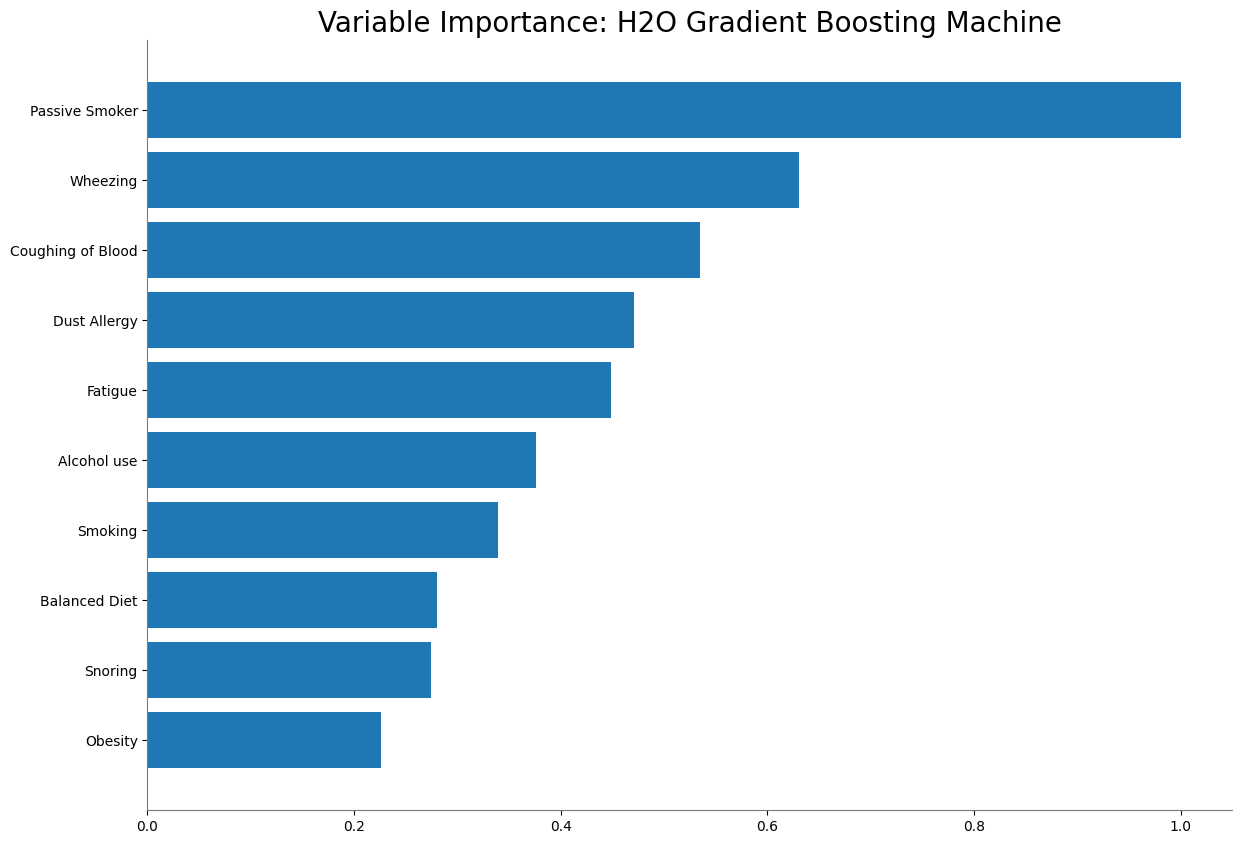

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot varible importance
out_gbm.varimp_plot()

In [ ]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/H2O")

'/content/drive/MyDrive/Machine Learning/H2O'